In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [22]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import random

def mandelbrot(x, y):
    z = c = complex(x, y)
    iteration = 0
    max_iteration = 511  # arbitrary cutoff
    while abs(z) < 2 and iteration < max_iteration:
        z = z * z + c
        iteration += 1
    return iteration

def sum_values_for_partitions(rdd):
    'Returns (as an RDD) the sum of V for each partition of a (K, V) RDD'
    # note that the function passed to mapPartitions should return a sequence,
    # not a value.
    return rdd.mapPartitions(lambda part: [sum(V for K, V in part)])

def draw_image(rdd):
    '''Given a (K, V) RDD with K = (I, J) and V = count,
    display an image of count at each I, J'''

    data = rdd.collect()
    I = np.array([d[0][0] for d in data])
    J = np.array([d[0][1] for d in data])
    C = np.array([d[1] for d in data])
    im = np.zeros((I.max() + 1, J.max() + 1))
    im[I, J] = np.log(C + 1)  # log intensity makes it easier to see levels
    plt.imshow(im, cmap=cm.gray)
    plt.show()


In [3]:
pixel = range(2000)

In [4]:
pix1D=sc.parallelize(pixel,10)

In [5]:
pixels = pix1D.cartesian(pix1D)

In [6]:
mandrdd = pixels.map(lambda i: (i, mandelbrot((i[1]/500.)-2,(i[0]/500.0)-2)))

In [7]:
mandrdd.take(3)

[((0, 0), 0), ((0, 1), 0), ((0, 2), 0)]

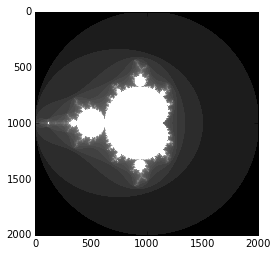

In [8]:
draw_image(mandrdd)

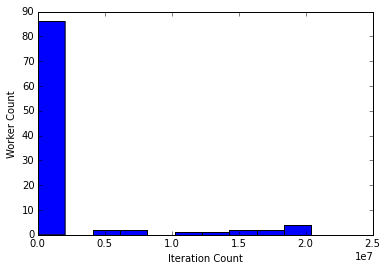

In [9]:
plt.hist(sum_values_for_partitions(mandrdd).collect())
plt.savefig("P2a_hist.png")
plt.xlabel("Iteration Count")
plt.ylabel("Worker Count")

In [29]:
range2000 = range(2000)
def randomList(a):
    b = []
    for i in range(len(a)):
        element = random.choice(a)
        a.remove(element)
        b.append(element)
    return b

randomlist = randomList(range2000)
pix1Drand = sc.parallelize(randomlist,10)
pixels2 = pix1Drand.cartesian(pix1Drand)

In [13]:
#pixelsb=pixels.partitionBy(100)

In [30]:
mandrdd2 = pixels2.map(lambda i: (i, mandelbrot((i[1]/500.)-2,(i[0]/500.0)-2)))

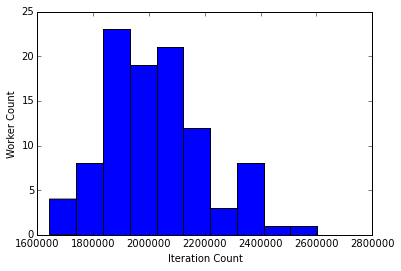

In [31]:
plt.hist(sum_values_for_partitions(mandrdd2).collect())
plt.savefig("P2b_hist.png")
plt.xlabel("Iteration Count")
plt.ylabel("Worker Count")

In [17]:
#sorted(pixels.partitionBy(100).glom().collect()[0], key= lambda x: x[0])

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (0, 42),
 (0, 43),
 (0, 44),
 (0, 45),
 (0, 46),
 (0, 47),
 (0, 48),
 (0, 49),
 (0, 50),
 (0, 51),
 (0, 52),
 (0, 53),
 (0, 54),
 (0, 55),
 (0, 56),
 (0, 57),
 (0, 58),
 (0, 59),
 (0, 60),
 (0, 61),
 (0, 62),
 (0, 63),
 (0, 64),
 (0, 65),
 (0, 66),
 (0, 67),
 (0, 68),
 (0, 69),
 (0, 70),
 (0, 71),
 (0, 72),
 (0, 73),
 (0, 74),
 (0, 75),
 (0, 76),
 (0, 77),
 (0, 78),
 (0, 79),
 (0, 80),
 (0, 81),
 (0, 82),
 (0, 83),
 (0, 84),
 (0, 85),
 (0, 86),
 (0, 87),
 (0, 88),
 (0, 89),
 (0, 90),
 (0, 91),
 (0, 92),
 (0, 93),
 (0, 94),
 (0, 95),
 (0, 96),
 (0, 97),
 (0, 98),
 (0, 99),
 (0, 100),